# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** Andrew Sivak
    
**NIA** :** 100520897 

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile

In [2]:
F_IMAGE1="chess.jpg"
F_IMAGE2="fence.jpg"

In [3]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

In [4]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([0.5, 0 , -0.5])
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [5]:
NUMPROCESS=4

In [39]:
filtered_image1_VECTOR=image1
filtered_image2_VECTOR=filter5

In [7]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [8]:
#YOUR CODE MUST BE START HERE

In [8]:
import image_filter as my
import filters_execution as fe
import importlib

In [22]:
importlib.reload(my)
importlib.reload(fe)

<module 'filters_execution' from 'C:\\Users\\andro\\Massive Computing\\Practical Work 01\\Practical Work 01\\filters_execution.py'>

In [23]:
%%time
filtered_image = image1.copy()
filter_o = my.image_filter(image1,filter5,NUMPROCESS,filtered_image)

CPU times: total: 156 ms
Wall time: 2.11 s


In [31]:
%%time
filtered_image1 = image1.copy()
filtered_image2 = image1.copy()
filter_o = fe.filters_execution(image1,filter1,filter5,NUMPROCESS,filtered_image1,filtered_image2)

CPU times: total: 31.2 ms
Wall time: 4.94 s


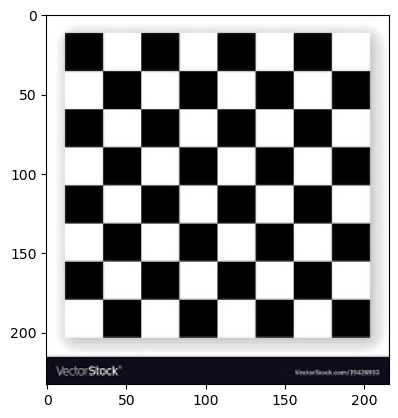

In [32]:
plt.figure()
plt.imshow(image1)

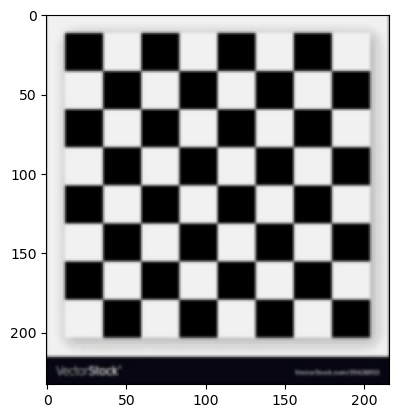

In [33]:
plt.figure()
plt.imshow(filtered_image)

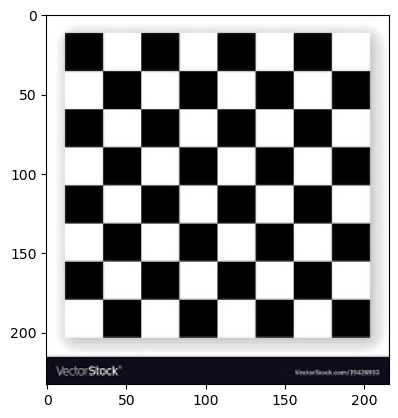

In [34]:
plt.figure()
plt.imshow(filtered_image1)

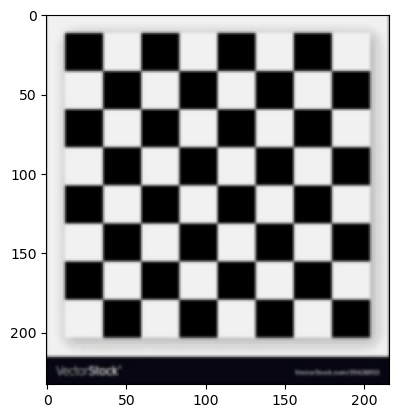

In [35]:
plt.figure()
plt.imshow(filtered_image2)

In [ ]:
#YOUR CODE MUST END HERE

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [20]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

AttributeError: 'str' object has no attribute 'get_obj'

In [14]:
plt.figure()
plt.imshow(filtered_image1)

NameError: name 'filtered_image1' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
plt.imshow(filtered_image2)

In [ ]:
Overall, parallelizing image filter functions was a success. At first, it was difficult to understand how the filters needed to interact with each image and how to apply these filters in a way that did not modify any of the images. However, once I understood what needed to be done, it became an easy task. Initially, parallelizing the filter was not an easy task, especially since I had only used functions in C to parallelize other projects before. But once I understood how parallel functions in Python worked, thanks to the notes and exercises done in class, I was able to implement a solution that worked in parallel. I did, however, find that making it possible for two of these functions to run in parallel was a bit of a challenge. With some perseverance, I was able to understand better how parallelization in Python worked and made sure that the code was able to function quickly. Overall, I would call this image filtering project a success. I was able to create several functions that took advantage of parallelization and significantly sped up my programs.